In [ ]:
!pip install mysql-connector-python

In [ ]:
!pip install pymysql

In [ ]:
!pip show torch
!pip show dgl
!pip show dglgo

Name: torch
Version: 2.3.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, ogb, torchaudio, torchdata, torchtext, torchvision
Name: dgl
Version: 2.3.0
Summary: Deep Graph Library
Home-page: https://github.com/dmlc/dgl
Author: 
Author-email: 
License: APACHE
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, psutil, requests, scipy, torchdata, tqdm
Required-by: 
Name: dglgo
Version: 0.0.2
Summary: DGL
Home-page: https://gith

In [ ]:
!pip uninstall dgl -y
!pip uninstall dglgo -y

Found existing installation: dgl 2.3.0
Uninstalling dgl-2.3.0:
  Successfully uninstalled dgl-2.3.0
Found existing installation: dglgo 0.0.2
Uninstalling dglgo-0.0.2:
  Successfully uninstalled dglgo-0.0.2


In [ ]:
!pip install dgl dglgo -f https://data.dgl.ai/wheels/torch-2.3/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.3/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/

In [ ]:
import requests

ip = requests.get('https://api.ipify.org').text
print(f'My public IP address is: {ip}')

My public IP address is: 34.48.187.226


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import mysql.connector

In [ ]:
import dgl
import dgl.nn as dgl_nn
import dgl.function as dgl_func
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
#from GraphTransformer.layer import *
#from metra import *
#from utils import *
from tqdm.notebook import tqdm
from IPython.display import clear_output
import scipy.sparse as sp
import math
import zipfile
import matplotlib.pyplot as plt
import os
import ssl
from six.moves import urllib
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset

torch.manual_seed(123)


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


### Trigger

## **Prepare data**

### hcmc_traffic_data

In [ ]:
class MySQLConnector:
    def __init__(self, host, port, user, password, database):
        self.host = host
        self.port = port
        self.user = user
        self.password = password
        self.database = database
        self.connection = None

    def connect(self):
        try:
            self.connection = mysql.connector.connect(
                host=self.host,
                port=self.port,
                user=self.user,
                password=self.password,
                database=self.database,
            )
            print("Connected to MySQL database")
        except mysql.connector.Error as err:
            print(f"Error: {err}")

    def execute_query(self, query):
        if self.connection is not None and self.connection.is_connected():
            cursor = self.connection.cursor()
            cursor.execute(query)
            records = cursor.fetchall()
            column_names = [i[0] for i in cursor.description]  # Get column names for DataFrame
            cursor.close()
            return records, column_names
        else:
            print("No connection to MySQL database. Please connect first.")
            return None, None

    def query_to_dataframe(self, query):
        records, column_names = self.execute_query(query)
        if records:
            df = pd.DataFrame(records, columns=column_names)
            return df
        else:
            print("Error: Query returned no results.")
            return None

    def close(self):
        if self.connection is not None and self.connection.is_connected():
            self.connection.close()
            print("MySQL connection is closed")
        else:
            print("No connection to MySQL database.")

In [ ]:
# Sử dụng
host = '34.142.166.212'
port = 3306
user = "TrTrongKhai"
password = "Nokhai14442002"
database = "hcmc-traffic-db"
#ssl_ca = r'content/drive/MyDrive/Thesis/Code/DigiCertGlobalRootG2.crt.pem'

# Khởi tạo đối tượng MySQLConnector
connector = MySQLConnector(host, port, user, password, database)

# Kết nối đến cơ sở dữ liệu
connector.connect()

# Thực hiện truy vấn SQL và chuyển kết quả thành DataFrameco

query = "SELECT * FROM traffic_data_batch"
df = connector.query_to_dataframe(query)

# Đóng kết nối
connector.close()

Connected to MySQL database
MySQL connection is closed


In [ ]:
df.head()

,datetime,0,1,2,3,4,5,7,8,9,...,129,130,131,132,133,135,136,137,138,139
0,2022-04-06 07:30:00,4.0,27.0,2.0,28.0,38.0,21.0,18.0,40.0,19.0,...,7.0,6.0,1.0,40.0,12.0,23.0,33.0,1.0,7.0,1.0
1,2022-04-06 07:35:00,2.0,19.0,4.0,34.0,29.0,23.0,14.0,27.0,20.0,...,11.0,12.0,1.0,28.0,9.0,16.0,36.0,9.0,5.0,1.0
2,2022-04-06 07:40:00,2.0,39.0,3.0,33.0,31.0,14.0,22.0,27.0,33.0,...,3.0,17.0,1.0,33.0,14.0,10.0,42.0,7.0,16.0,1.0
3,2022-04-06 07:45:00,5.0,34.0,3.0,26.0,31.0,24.0,26.0,24.0,35.0,...,24.0,14.0,2.0,29.0,16.0,13.0,50.0,8.0,14.0,4.0
4,2022-04-06 07:50:00,5.0,33.0,2.0,29.0,36.0,11.0,14.0,30.0,29.0,...,7.0,4.0,2.0,37.0,13.0,13.0,38.0,6.0,13.0,2.0


In [ ]:
df_ = df.copy()

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5973 entries, 0 to 5972
Columns: 123 entries, datetime to 139
dtypes: datetime64[ns](1), float64(122)
memory usage: 5.6 MB


In [ ]:
df_.set_index('datetime', inplace=True)

In [ ]:
def generate_graph_seq2seq_io_data(
        df, x_offsets, y_offsets, add_time_in_day=True, add_day_in_week=False, scaler=None
):
    num_samples, num_nodes = df.shape
    data = np.expand_dims(df.values, axis=-1)
    data_list = [data]
    if add_time_in_day:
        time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
        time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
        data_list.append(time_in_day)
    if add_day_in_week:
        day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
        day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
        data_list.append(day_in_week)

    data = np.concatenate(data_list, axis=-1)
    x, y = [], []
    min_t = abs(min(x_offsets))
    max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
    for t in range(min_t, max_t):
        x_t = data[t + x_offsets, ...]
        y_t = data[t + y_offsets, ...]
        x.append(x_t)
        y.append(y_t)
    x = np.stack(x, axis=0)
    y = np.stack(y, axis=0)
    return x, y


# Định nghĩa các giá trị bù
x_offsets = np.sort(np.concatenate((np.arange(-11, 1, 1),)))
y_offsets = np.sort(np.arange(1, 13, 1))

# Tạo các mẫu dữ liệu
x, y = generate_graph_seq2seq_io_data(
    df_,
    x_offsets=x_offsets,
    y_offsets=y_offsets,
    add_time_in_day=True,
    add_day_in_week=False,
)

print("x shape: ", x.shape, ", y shape: ", y.shape)

x shape:  (5950, 12, 122, 2) , y shape:  (5950, 12, 122, 2)


In [ ]:
def generate_train_val_test(x, y, x_offsets, y_offsets):
    num_samples = x.shape[0]
    num_test = round(num_samples * 0.2)
    num_train = round(num_samples * 0.7)
    num_val = num_samples - num_test - num_train

    # Chia dữ liệu thành tập huấn luyện, kiểm tra và kiểm định
    x_train, y_train = x[:num_train], y[:num_train]
    x_val, y_val = x[num_train: num_train + num_val], y[num_train: num_train + num_val]
    x_test, y_test = x[-num_test:], y[-num_test:]

    # In kích thước của từng tập
    for cat, _x, _y in zip(["train", "val", "test"], [x_train, x_val, x_test], [y_train, y_val, y_test]):
        print(cat, "x: ", _x.shape, "y:", _y.shape)

    return (x_train, y_train), (x_val, y_val), (x_test, y_test), x_offsets, y_offsets

# Sử dụng hàm để chia dữ liệu và trả về các mảng dữ liệu
train_data, val_data, test_data, x_offsets, y_offsets = generate_train_val_test(x, y, x_offsets, y_offsets)

train x:  (4165, 12, 122, 2) y: (4165, 12, 122, 2)
val x:  (595, 12, 122, 2) y: (595, 12, 122, 2)
test x:  (1190, 12, 122, 2) y: (1190, 12, 122, 2)


In [ ]:
# Sử dụng dữ liệu huấn luyện
x_train, y_train = train_data
print("Train x shape: ", x_train.shape)
print("Train y shape: ", y_train.shape)

# Sử dụng dữ liệu kiểm tra
x_val, y_val = val_data
print("Validation x shape: ", x_val.shape)
print("Validation y shape: ", y_val.shape)

# Sử dụng dữ liệu kiểm định
x_test, y_test = test_data
print("Test x shape: ", x_test.shape)
print("Test y shape: ", y_test.shape)

Train x shape:  (4165, 12, 122, 2)
Train y shape:  (4165, 12, 122, 2)
Validation x shape:  (595, 12, 122, 2)
Validation y shape:  (595, 12, 122, 2)
Test x shape:  (1190, 12, 122, 2)
Test y shape:  (1190, 12, 122, 2)


In [ ]:
# Transform data - Add thêm 1 chiều thời gian vào data
# Make sample Time
sample = np.array([i for i in range(1,1261)]) #5 phút 1 lần, 7h30 - 22h30 có 15 * 12 * 7


# Transform

x = np.concatenate((x_train,x_val,x_test),axis = 0)
num_record,seq,num_node,dim = x.shape
x = x.reshape(num_record,seq*num_node,dim)


pos = 0
x_final = []
for i in range(len(x)):
  if pos == 1260:
    pos = 0
  k = np.c_[x[i],np.array([sample[pos]]*1464)]
  x_final.append(k)
  pos += 1
x_final = np.array(x_final)
mean = np.mean(x_final,axis = (0,1))
std = np.std(x_final,axis = (0,1))
mean = mean.reshape(1,1,-1)
std = std.reshape(1,1,-1)
print('mean:',mean)
print('std:',std)

x_train = x_final[0:4165,:,:]
x_val = x_final[4165:4165+595,:,:]
x_test = x_final[4165+595:,:,:]
x_train = x_train.reshape(4165,12,122,3)
x_val = x_val.reshape(595,12,122,3)
x_test = x_test.reshape(1190,12,122,3)


train_data_last = list(zip(x_train,y_train))
valid_data_last = list(zip(x_val,y_val))
test_data_last = list(zip(x_test,y_test))

mean: [[[ 20.51630114   0.62444678 603.73529412]]]
std: [[[1.35465691e+01 1.80888887e-01 3.55791356e+02]]]


In [ ]:
x_train.shape

(4165, 12, 122, 3)

### Graphs

In [ ]:
# Sử dụng
host = "34.142.166.212"
port = 3306
user = "TrTrongKhai"
password = "Nokhai14442002"
database = "ghcmc-traffic-db"
# Khởi tạo đối tượng MySQLConnector
connector = MySQLConnector(host, port, user, password, database)

# Kết nối đến cơ sở dữ liệu
connector.connect()

# Thực hiện truy vấn SQL và chuyển kết quả thành DataFrame
query1 = "SELECT * FROM nodes_df"
nodes_df = connector.query_to_dataframe(query1)

query2 = "SELECT * FROM adjacency_matrix_df"  # Thay đổi truy vấn SQL tại đây
adjacency_matrix_df = connector.query_to_dataframe(query2)

query3 = "SELECT * FROM distance_matrix_df"
distance_matrix_df = connector.query_to_dataframe(query3)
# Đóng kết nối
connector.close()

Connected to MySQL database
MySQL connection is closed


In [ ]:
display(nodes_df.head())
display(adjacency_matrix_df.head())
display(distance_matrix_df.head())

,node_id,node_name,latitude,longitude
0,0,Khánh Hội - Hoàng Diệu,10.7596,106.699
1,1,Cao Thắng - Võ Văn Tần 1,10.7687,106.684
2,10,Nguyễn Hữu Cảnh - Ngô Tất Tố 1,10.7892,106.715
3,100,Nam Kỳ Khởi Nghĩa - Lê Lợi,10.7731,106.700
4,101,Cách Mạng Tháng Tám - Nguyễn Thị Minh Khai,10.7737,106.690


,sensor_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s130,s131,s132,s133,s134,s135,s136,s137,s138,s139
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,sensor_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s130,s131,s132,s133,s134,s135,s136,s137,s138,s139
0,0,0,0,0,560,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,423,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
nodes_df['node_id'] = nodes_df['node_id'].astype(int)

In [ ]:
def remove_missing_sensors(df, missing_sensors):
    columns_to_drop = ['s' + str(sensor) for sensor in missing_sensors]
    index_to_drop = [sensor for sensor in missing_sensors]
    df = df.drop(columns_to_drop, axis=1)
    df = df.drop(index_to_drop, axis=0)

    return df

In [ ]:
# Liệt kê các sensors bị thiếu
all_sensors = set(range(140))
present_sensors = set(df_.columns.astype('int64'))
missing_sensors = all_sensors - present_sensors

print("Các sensor bị thiếu là:", missing_sensors)

Các sensor bị thiếu là: {128, 33, 6, 39, 72, 122, 134, 13, 77, 79, 50, 82, 114, 85, 88, 58, 91, 62}


In [ ]:
adjacency_matrix_df_ = remove_missing_sensors(adjacency_matrix_df, missing_sensors)
display(adjacency_matrix_df_.shape)
distance_matrix_df_ = remove_missing_sensors(distance_matrix_df, missing_sensors)
display(distance_matrix_df_.shape)

(122, 123)

(122, 123)

In [ ]:
adjacency_matrix = adjacency_matrix_df_.iloc[:, 1:].to_numpy()
distance_matrix = distance_matrix_df_.iloc[:, 1:].to_numpy()

In [ ]:
adjacency_matrix.shape

(122, 122)

In [ ]:
def create_graph_from_matrices(adj_matrix, dist_matrix):
    # Chuyển đổi ma trận kề và ma trận khoảng cách sang tensor của PyTorch
    adj_tensor = torch.tensor(adj_matrix)
    dist_tensor = torch.tensor(dist_matrix, dtype=torch.float32)

    # Lấy danh sách các cạnh từ ma trận kề
    src, dst = adj_tensor.nonzero(as_tuple=True)

    # Tạo đồ thị từ danh sách cạnh
    graph = dgl.graph((src, dst), num_nodes=adj_tensor.shape[0])

    # Thêm thuộc tính trọng số cho các cạnh từ distance_matrix
    edge_weights = dist_tensor[src, dst]
    graph.edata['weight'] = edge_weights

    # Create sensor ID to node index map
    sensor_id_to_node_idx_map = {}
    for i, sensor_id in enumerate(present_sensors):
        node_idx = i  # Assuming sensor IDs match node indices in this example
        sensor_id_to_node_idx_map[sensor_id] = node_idx

    # Initialize the 'sensor_id' node feature # NEW CODE
    graph.ndata['sensor_id'] = torch.zeros(adj_tensor.shape[0], dtype=torch.int64)

    # Assign sensor IDs to nodes
    for sensor_id in present_sensors:
        node_idx = sensor_id_to_node_idx_map[sensor_id]
        graph.ndata['sensor_id'][node_idx] = sensor_id

    return graph

# Tạo đồ thị từ adjacency_matrix và distance_matrix
g = create_graph_from_matrices(adjacency_matrix, distance_matrix)

In [ ]:
def positional_encoding(g, pos_enc_dim):
    """
        Graph positional encoding v/ Laplacian eigenvectors
    """

    # Laplacian
    A = g.adj_external(scipy_fmt='csr')
    in_degrees = g.in_degrees().float().clamp(min=1)  # Directly access in-degrees
    N = sp.diags(np.power(in_degrees.numpy(), -0.5), dtype=float)
    L = sp.eye(g.number_of_nodes()) - N * A * N

    # Eigenvectors with numpy
    EigVal, EigVec = np.linalg.eig(L.toarray())
    idx = EigVal.argsort() # increasing order
    EigVal, EigVec = EigVal[idx], np.real(EigVec[:,idx])
    lap_pos = torch.from_numpy(EigVec[:,1:pos_enc_dim+1]).float()

    # # Eigenvectors with scipy
    # EigVal, EigVec = sp.linalg.eigs(L, k=pos_enc_dim+1, which='SR')
    # EigVec = EigVec[:, EigVal.argsort()] # increasing order
    # g.ndata['pos_enc'] = torch.from_numpy(np.abs(EigVec[:,1:pos_enc_dim+1])).float()

    return lap_pos

In [ ]:
pos_enc_dim = 10
lap_pos = positional_encoding(g, pos_enc_dim)
g.ndata['lap_pos'] = lap_pos

In [ ]:
g

Graph(num_nodes=122, num_edges=307,
      ndata_schemes={'sensor_id': Scheme(shape=(), dtype=torch.int64), 'lap_pos': Scheme(shape=(10,), dtype=torch.float32)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

## Attention and transformer blocks

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, in_dim, dim, num_head, bias):
        super().__init__()
        assert dim % num_head == 0, "Unexpected embedding dimension"

        self.head_dim = dim // num_head
        self.num_head = num_head
        self.scale = 1./(dim ** (0.5))

        self.Wq_c = nn.Linear(in_dim, dim, bias=bias) # out = 16
        self.Wq_p = nn.Linear(in_dim, dim, bias = bias)
        self.Wk = nn.Linear(in_dim, dim, bias=bias)
        self.Wv = nn.Linear(in_dim, dim, bias=bias)

    def _reshape_qkv(self, q_c, q_p, k, v):
        '''
            q, k, v: (N, D_h * N_h)
            return: (N, N_h, D_h)
        '''
        q_c = q_c.view(-1, self.num_head, self.head_dim)
        q_p = q_p.view(-1, self.num_head, self.head_dim)
        k = k.view(-1, self.num_head, self.head_dim)
        v = v.view(-1, self.num_head, self.head_dim)
        return q_c, q_p, k, v

    def query_by_current_state(self, edges):
        Q, K = edges.dst['Q_c'], edges.src['K']
        score = (Q * K).sum(-1, keepdim = True)
        score = score * self.scale
        score = torch.exp(score.clamp(-5,5))
        return {'score_c': score}

    def query_by_previous_state(self, edges):
        Q, K = edges.dst['Q_p'], edges.src['K']
        score = (Q * K).sum(-1, keepdim = True)
        score = score * self.scale
        score = torch.exp(score.clamp(-5,5))
        return {'score_p': score}

    def propagate_attention(self, g):
        g.apply_edges(self.query_by_current_state)
        g.apply_edges(self.query_by_previous_state)
        eids = g.edges()

        g.send_and_recv(eids, message_func = dgl_func.u_mul_e('V', 'score_c', 'V'), reduce_func= dgl_func.sum('V', 'SV_c'))
        #g.send_and_recv(eids, message_func = dgl_fnc.copy_edge('score_c', 'score_c'), reduce_func = dgl_fnc.sum('score_c', 'z_c'))

        g.send_and_recv(eids, message_func = dgl_func.u_mul_e('V', 'score_p', 'V'), reduce_func= dgl_func.sum('V', 'SV_p'))
        #g.send_and_recv(eids, message_func = dgl_fnc.copy_edge('score_p', 'score_p'), reduce_func = dgl_fnc.sum('score_p', 'z_p'))

    def forward(self, g, h_c, h_p):
        with g.local_scope():
            Q_c, Q_p, K, V = self.Wq_c(h_c), self.Wq_p(h_p), self.Wk(h_c), self.Wv(h_c)
            Q_c, Q_p, K, V = self._reshape_qkv(Q_c, Q_p, K, V)
            g.ndata['Q_c'] = Q_c
            g.ndata['Q_p'] = Q_p
            g.ndata['K'] = K
            g.ndata['V'] = V
            self.propagate_attention(g)
            h_c = g.ndata['SV_c'] #/ (g.ndata['z_c'] + torch.full_like(g.ndata['z_c'], 1e-6))
            h_c = h_c.view(-1, self.head_dim * self.num_head)
            h_p = g.ndata['SV_p'] #/ (g.ndata['z_p'] + torch.full_like(g.ndata['z_p'], 1e-6))
            h_p = h_p.view(-1, self.head_dim * self.num_head)
            return h_c, h_p

class ST_Block(nn.Module):
    def __init__(self, in_dim, out_dim, num_head, bias = True, dropout = 0.25, norm = "LayerNorm"):
        super().__init__()
        self.dropout = dropout
        self.multihead_attention = MultiHeadAttention(in_dim, out_dim, num_head, bias)
        self.Wo_c = nn.Linear(out_dim, in_dim, bias = bias)
        self.Wo_p = nn.Linear(out_dim, in_dim, bias = bias)

        if norm == 'LayerNorm':
            self.norm_c = nn.LayerNorm(in_dim)
            self.norm_p = nn.LayerNorm(in_dim)
            self.norm_r = nn.LayerNorm(in_dim)
        else:
            self.norm_c = nn.BatchNorm1d(in_dim)
            self.norm_p = nn.BatchNorm1d(in_dim)
            self.norm_r = nn.BatchNorm1d(in_dim)

        self.mlp = nn.Sequential(
            nn.Linear(in_dim * 2, in_dim * 2),
            nn.ReLU(),
            nn.Linear(in_dim * 2, in_dim)
        )
        self.residual = nn.Linear(in_dim * 2, in_dim)

    def forward(self, g, h_c, h_p):
        h_r_c, h_r_p = h_c, h_p
        h_c, h_p = self.multihead_attention(g, h_c, h_p)
        h_c, h_p = self.Wo_c(h_c), self.Wo_p(h_p)

        h_c = self.norm_c(h_c + h_r_c)
        h_p = self.norm_p(h_p + h_r_p)

        h = torch.cat([h_c, h_p], dim = -1)
        h_r = self.residual(h)
        h = self.mlp(h)
        h = self.norm_r(h + h_r)
        return h

## Encoder, Decoder and Model

In [ ]:
class Encoder(nn.Module):
    def __init__(self, in_dim, hidden_dim, K, dim, num_head, bias = False, norm = "LayerNorm", num_steps = 5):
        super().__init__()
        self.num_steps = num_steps
        self.blocks = nn.ModuleList([
            ST_Block(hidden_dim, dim, num_head, bias = bias, norm = norm)
            for i in range(self.num_steps)
        ])
        self.node_embedding = nn.Linear(in_dim, hidden_dim)
        self.pos_embedding = nn.Linear(K, hidden_dim)
        self.hidden_dim = hidden_dim

    def forward(self, g, H):
        # H (num_steps, num_nodes, num_features)
        lap_pos = g.ndata['lap_pos']
        lap_pos = self.pos_embedding(lap_pos)
        state = None
        for i in range(self.num_steps):
            h = H[i, :, :]
            h = self.node_embedding(h) + lap_pos
            if state is None:
                state = torch.zeros_like(h)
            state = self.blocks[i](g, h, state)
        return state


class Decoder(nn.Module):
    def __init__(self, out_dim, hidden_dim, K,dim, num_head, bias = False, norm = "LayerNorm", num_steps = 5):
        super().__init__()
        self.num_steps = num_steps
        self.blocks = nn.ModuleList([
            ST_Block(hidden_dim, dim, num_head, bias = bias, norm = norm)
            for i in range(self.num_steps)
        ])
        self.node_embedding = nn.Linear(hidden_dim, hidden_dim)
        self.pos_embedding = nn.Linear(K, hidden_dim)
        self.output_layer = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    def _train(self, g, encoder_output, target):
        num_node,_ = target.shape
        outputs = torch.zeros(self.num_steps, num_node,dtype = target.dtype, device = target.device)
        state = encoder_output
        h = target
        h = self.node_embedding(h) + self.lap_pos
        for i in range(self.num_steps):
            state = self.blocks[i](g, h, state)
            out = self.output_layer(state)
            outputs[i] = out.squeeze()
        return outputs

    def _infer(self, g, encoder_output, last):
        num_node, _ = last.shape
        outputs = torch.zeros(self.num_steps, num_node, dtype = last.dtype, device = last.device)
        state = encoder_output
        out = None
        for i in range(self.num_steps):
            h = self.node_embedding(last) + self.lap_pos
            state = self.blocks[i](g, h, state)
            out = self.output_layer(state)
            last = out
            outputs[i] = out.squeeze()
        return outputs

    def forward(self, g, encoder_output, target):
        lap_pos = g.ndata['lap_pos']
        self.lap_pos = self.pos_embedding(lap_pos)
        #target = target.unsqueeze(-1)
        return self._train(g, encoder_output, target)

class STGraphTransformers(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, K, dim, num_head, bias = False, norm = "LayerNorm", num_encode_steps = 5, num_decode_steps = 5):
        super().__init__()
        self.encoder = Encoder(in_dim, hidden_dim, K,dim, num_head, bias, norm, num_encode_steps)
        self.decoder = Decoder(out_dim ,hidden_dim, K,dim, num_head, bias, norm, num_decode_steps)

        self.readout = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim)
        )
    def forward(self, g, x, target):
        state = self.encoder(g, x)
        #last = x[-1, :, 0].unsqueeze(-1) # chỉ lấy data_x[0] vì đầu vào target có dim = 1
        state = self.readout(state)
        return self.decoder(g, state, target) # last is the last x in sequence -- target is y at current

In [ ]:
#collate_fn
def collate_fn(batch):
  x_list,y_list = [],[]
  for (x,y) in batch:
    x_list.append(x)
    y_list.append(y)
  x_list = np.array(x_list)
  y_list = np.array(y_list)
  return torch.tensor(x_list),torch.tensor(y_list)

batch_size = 128

In [ ]:
train_loader = DataLoader(train_data_last, batch_size= batch_size, num_workers= 2, shuffle=True, collate_fn = collate_fn)
valid_loader = DataLoader(valid_data_last, batch_size= batch_size, num_workers= 2, shuffle=False, collate_fn = collate_fn)
test_loader  = DataLoader(test_data_last,  batch_size= batch_size, num_workers= 2, shuffle=False, collate_fn = collate_fn)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [ ]:
def masked_mae_loss(y_pred, y_true,test=True):
    mask = (y_true != 0).float()
    mask /= mask.mean()
    loss = torch.abs(y_pred - y_true)
    loss = loss * mask
    # trick for nans: https://discuss.pytorch.org/t/how-to-set-nan-in-tensor-to-0/3918/3
    loss[loss != loss] = 0
    loss_12 =  loss.mean()

    mask_6 = (y_true[:6] != 0).float()
    mask_6 /= mask_6.mean()
    loss_6 = torch.abs(y_pred[:6] - y_true[:6])
    loss_6 = loss_6 * mask_6
    loss_6[loss_6 != loss_6] = 0
    loss_6_ = loss_6.mean()

    mask_3 = (y_true[:3] != 0).float()
    mask_3 /= mask_3.mean()
    loss_3 = torch.abs(y_pred[:3] - y_true[:3])
    loss_3 = loss_3 * mask_3
    loss_3[loss_3 != loss_3] = 0
    loss_3_ = loss_3.mean()
    if test == True:
      return torch.tensor([loss_12,loss_6_,loss_3_])
    else:
      return loss_12

def masked_mse_loss(y_pred, y_true):
    mask = (y_true != 0).float()
    mask /= mask.mean()
    loss = (y_pred - y_true)**2
    loss = loss * mask
    # trick for nans: https://discuss.pytorch.org/t/how-to-set-nan-in-tensor-to-0/3918/3
    loss[loss != loss] = 0
    loss_12 = loss.mean()

    mask_6 = (y_true[:6] != 0).float()
    mask_6 /= mask_6.mean()
    loss_6 = (y_pred[:6] - y_true[:6])**2
    loss_6 = loss_6 * mask_6
    loss_6[loss_6 != loss_6] = 0
    loss_6_ = loss_6.mean()

    mask_3 = (y_true[:3] != 0).float()
    mask_3 /= mask_3.mean()
    loss_3 = (y_pred[:3] - y_true[:3])**2
    loss_3 = loss_3 * mask_3
    loss_3[loss_3 != loss_3] = 0
    loss_3_ = loss_3.mean()

    return torch.tensor([loss_12,loss_6_,loss_3_])

def masked_mape_loss(y_pred, y_true):
    mask = (y_true != 0).float()
    mask /= mask.mean()
    loss = (y_true - y_pred).abs() / y_true.abs()
    loss = loss * mask
    # trick for nans: https://discuss.pytorch.org/t/how-to-set-nan-in-tensor-to-0/3918/3
    loss[loss != loss] = 0
    loss_12 = loss.mean()

    mask_6 = (y_true[:6] != 0).float()
    mask_6 /= mask_6.mean()
    loss_6 = (y_pred[:6] - y_true[:6]).abs()/y_true[:6].abs()
    loss_6 = loss_6 * mask_6
    loss_6[loss_6 != loss_6] = 0
    loss_6_ = loss_6.mean()

    mask_3 = (y_true[:3] != 0).float()
    mask_3 /= mask_3.mean()
    loss_3 = (y_pred[:3] - y_true[:3]).abs()/y_true[:3].abs()
    loss_3 = loss_3 * mask_3
    loss_3[loss_3 != loss_3] = 0
    loss_3_ = loss_3.mean()

    return torch.tensor([loss_12,loss_6_,loss_3_])

In [ ]:
#del model
#torch.cuda.empty_cache()

In [ ]:
model = STGraphTransformers(3, 12, 1, 10, 12*4, 4, bias = True, norm = "LayerNorm", num_encode_steps = 12, num_decode_steps = 12).to(device)
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001, weight_decay = 0.001, momentum = 0.009)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, amsgrad = True)
loss_fn = masked_mae_loss

In [ ]:
best_loss = [100]
'''try:
    best_loss[0] = checkpoint['loss']
    epoch = checkpoint['epoch']
except:
    best_loss[0] = 100
    epoch = 0'''

"try:\n    best_loss[0] = checkpoint['loss']\n    epoch = checkpoint['epoch']\nexcept:\n    best_loss[0] = 100\n    epoch = 0"

In [ ]:
best_loss = [100]
epoch = 0

print("Best Loss: ", best_loss[0])
print("Epoch: ", epoch)

Best Loss:  100
Epoch:  0


In [ ]:
num_samples = len(train_data)
batch_size = 128
x,y = next(enumerate(train_loader))
x

0

In [ ]:
import numpy as np
def train_1(model, g, train_loader, lap_pos, loss_fn, optimizer, batch_size, num_samples):
    total_loss = []
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader), total = num_samples // batch_size):

        lap_pos = g.ndata['lap_pos']
        sign_flip = torch.rand(lap_pos.size(1))
        sign_flip[sign_flip>=0.5] = 1.0; sign_flip[sign_flip<0.5] = -1.0
        lap_pos = lap_pos * sign_flip.unsqueeze(0)
        g.ndata['lap_pos'] = lap_pos

        bs,seq_len, num_node, dim = x.shape

        batch_g = dgl.batch([g] * bs).to(device)
        # Chỉ lấy feature 0 của y để predict
        y = y[..., 0]
        x = x.permute(1, 0, 2, 3) # sequence, bs, num_node, dim = 3
        y = y.permute(1, 0, 2) # vì chỉ lấy dim[0] nên chiều dim biến mất

        x = x.reshape(seq_len, bs * num_node, dim).cpu().numpy()
        y = y.reshape(seq_len, bs * num_node).cpu().numpy()

        x = (x - mean) / std
        x = torch.tensor(x).float().clone().to(device)
        #y = torch.tensor(y).float().clone().to(device)
        targets = x.permute(1,0,2) #num_node,seq_len,dim
        targets = targets[...,0]

        targets = torch.tensor(targets).float().clone().to(device)
        # chiều dài targets và y là 11. với mỗi target sẽ predict y tại vị trí tương ứng
        y = torch.tensor(y).float().clone().to(device)

        optimizer.zero_grad()
        out = model(batch_g, x, targets) # out trả về chỉ có 11 điểm (11 num_steps)
        #out = scaler.inverse_scale(out, mean[0], std[0])
        out = out * std[0,0,0] + mean[0,0,0]

        loss = loss_fn(out, y,test = False)
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()


        total_loss.append(loss.detach().item())
    return np.mean(total_loss)


def eval_1(model, g, val_loader, lap_pos, loss_fn, batch_size, num_samples):
    model.eval()
    total_loss = []
    for idx, (x, y) in tqdm(enumerate(val_loader), total = num_samples // batch_size):
        '''
        lap_pos = g.ndata['lap_pos']
        sign_flip = torch.rand(lap_pos.size(1))
        sign_flip[sign_flip>=0.5] = 1.0; sign_flip[sign_flip<0.5] = -1.0
        lap_pos = lap_pos * sign_flip.unsqueeze(0)
        '''
        g.ndata['lap_pos'] = lap_pos

        bs, seq_len, num_node, dim = x.shape

        batch_g = dgl.batch([g] * bs).to(device)

        y = y[..., 0]
        x = x.permute(1, 0, 2, 3)
        y = y.permute(1, 0, 2)

        x = x.reshape(seq_len, bs * num_node, dim).numpy()
        y = y.reshape(seq_len, bs * num_node).numpy()

        x = (x - mean) / std
        x = torch.tensor(x).float().clone().to(device)
        targets = x.permute(1,0,2)
        targets = targets[...,0]
        #targets = y[:-1]
        #targets = scaler.scale(targets, mean[0],std[0])
        #targets = (targets - mean[0,0,0])/std[0,0,0]
        #targets = torch.tensor(targets).float().clone().to(device)
        y = torch.tensor(y).float().clone().to(device)

        with torch.no_grad():
            out = model(batch_g, x, targets).squeeze()
        #out = scaler.inverse_scale(out, mean[0], std[0])
        out = out * std[0,0,0] + mean[0,0,0]

        loss = loss_fn(out, y,test = False)
        #loss = torch.sqrt(loss_fn(out, y))
        total_loss.append(loss.detach().item())
        del loss

    return np.mean(total_loss)

def test_1(model, g, val_loader, lap_pos, metrics, batch_size, num_samples, num_steps):
    model.eval()
    total_rmse = []
    total_rmse_6 = []
    total_rmse_3 = []
    total_mae = []
    total_mae_6 = []
    total_mae_3 = []
    total_mape = []
    total_mape_6 = []
    total_mape_3 = []
    predictions = []
    actuals = []
    for idx, (x, y) in tqdm(enumerate(val_loader), total = num_samples // batch_size):

        g.ndata['lap_pos'] = lap_pos

        bs, seq_len , num_node, dim = x.shape

        batch_g = dgl.batch([g] * bs).to(device)

        y = y[..., 0]
        x = x.permute(1, 0, 2, 3)
        y = y.permute(1, 0, 2)

        x = x.reshape(seq_len, bs * num_node, dim).cpu().numpy()
        y = y.reshape(seq_len, bs * num_node).cpu().numpy()

        x = (x - mean) / std

        x = torch.tensor(x).float().clone().to(device)
        targets = x.permute(1,0,2)
        targets = targets[...,0]
        y = torch.tensor(y).float().clone().to(device)

        with torch.no_grad():
            out = model(batch_g, x, targets).squeeze()
        out = out * std[0,0,0] + mean[0,0,0]
        # num_steps_out = 11 vì lấy block trước predict block sau

        #mae = metrics['mae'](out, y).detach().item()
        mae = metrics['mae'](out, y)[0].detach()
        mae_6 = metrics['mae'](out, y)[1].detach()
        mae_3 = metrics['mae'](out, y)[2].detach()
        rmse = torch.sqrt(metrics['mse'](out, y)[0]).detach()
        rmse_6 = torch.sqrt(metrics['mse'](out, y)[1]).detach()
        rmse_3 = torch.sqrt(metrics['mse'](out, y)[2]).detach()
        mape = metrics['mape'](out, y)[0].detach()
        mape_6 = metrics['mape'](out, y)[1].detach()
        mape_3 = metrics['mape'](out, y)[2].detach()

        total_mae.append(mae)
        total_mae_6.append(mae_6)
        total_mae_3.append(mae_3)
        total_rmse.append(rmse)
        total_rmse_6.append(rmse_6)
        total_rmse_3.append(rmse_3)
        total_mape.append(mape)
        total_mape_6.append(mape_6)
        total_mape_3.append(mape_3)

        out = out.detach().cpu().numpy().reshape(num_steps, bs, num_node)
        y = y.detach().cpu().numpy().reshape(num_steps, bs, num_node)

        out = np.transpose(out, axes = (1, 2, 0))
        y = np.transpose(y, axes = (1, 2, 0))

        predictions += out[:, -1, :].tolist()
        actuals += y[:, -1, :].tolist()

    return np.mean(total_mae), np.mean(total_mae_6), np.mean(total_mae_3), np.mean(total_rmse), np.mean(total_rmse_6), np.mean(total_rmse_3), np.mean(total_mape), np.mean(total_mape_6), np.mean(total_mape_3), predictions, actuals


In [ ]:
# Đường dẫn thư mục trong Google Drive
output_dir = '/content/drive/My Drive/Best'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory {output_dir} created")
else:
    print(f"Directory {output_dir} already exists")


# Sau đó bạn có thể lưu mô hình vào thư mục này như sau:
epoch = 0
best_loss = [100]# Giá trị khởi tạo cho best_loss
print("Best Loss", best_loss[0])
for e in range(20):
    print("Epoch: ", epoch + e)
    print("Best Validation Loss", best_loss[0])
    tmp_loss = best_loss[0]
    train_loss = train_1(model, g, train_loader, lap_pos, loss_fn, optimizer, batch_size, len(train_data))
    val_loss = eval_1(model, g, valid_loader, lap_pos, loss_fn, batch_size, len(val_data))
    print("Train Loss: {}, Val Loss: {}".format(train_loss, val_loss))

    if best_loss[0] > val_loss:
        best_loss[0] = val_loss
        torch.save({
                'epoch' : epoch + e,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss' : val_loss,
                }, os.path.join(output_dir, 'transform_hcmc.pt'))
        print("------------- Saved model ------------")
    print()

Directory /content/drive/My Drive/Best already exists
Best Loss 100
Epoch:  0
Best Validation Loss 100


0it [00:00, ?it/s]

<ipython-input-108-d4a3a532da84>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets).float().clone().to(device)


0it [00:00, ?it/s]

Train Loss: 8.850792480237557, Val Loss: 5.889628314971924
------------- Saved model ------------

Epoch:  1
Best Validation Loss 5.889628314971924


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 6.2405398686726885, Val Loss: 4.996040630340576
------------- Saved model ------------

Epoch:  2
Best Validation Loss 4.996040630340576


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.636049761916652, Val Loss: 4.776906490325928
------------- Saved model ------------

Epoch:  3
Best Validation Loss 4.776906490325928


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.436875141028202, Val Loss: 4.715851593017578
------------- Saved model ------------

Epoch:  4
Best Validation Loss 4.715851593017578


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.357542702645967, Val Loss: 4.6846545219421385
------------- Saved model ------------

Epoch:  5
Best Validation Loss 4.6846545219421385


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.323646805503151, Val Loss: 4.676108646392822
------------- Saved model ------------

Epoch:  6
Best Validation Loss 4.676108646392822


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.298475568944758, Val Loss: 4.671337509155274
------------- Saved model ------------

Epoch:  7
Best Validation Loss 4.671337509155274


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.273830139275753, Val Loss: 4.672739028930664

Epoch:  8
Best Validation Loss 4.671337509155274


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.255757216251258, Val Loss: 4.668571472167969
------------- Saved model ------------

Epoch:  9
Best Validation Loss 4.668571472167969


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.22887000170621, Val Loss: 4.643842697143555
------------- Saved model ------------

Epoch:  10
Best Validation Loss 4.643842697143555


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.2149631182352705, Val Loss: 4.682185268402099

Epoch:  11
Best Validation Loss 4.643842697143555


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.169572122169264, Val Loss: 4.680020046234131

Epoch:  12
Best Validation Loss 4.643842697143555


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.140281185959324, Val Loss: 4.641467189788818
------------- Saved model ------------

Epoch:  13
Best Validation Loss 4.641467189788818


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.131461259090539, Val Loss: 4.715671730041504

Epoch:  14
Best Validation Loss 4.641467189788818


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 5.054628415541216, Val Loss: 4.642658042907715

Epoch:  15
Best Validation Loss 4.641467189788818


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 4.993151679183498, Val Loss: 4.625735569000244
------------- Saved model ------------

Epoch:  16
Best Validation Loss 4.625735569000244


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 4.970424435355446, Val Loss: 4.655149459838867

Epoch:  17
Best Validation Loss 4.625735569000244


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 4.987165985685406, Val Loss: 4.62291259765625
------------- Saved model ------------

Epoch:  18
Best Validation Loss 4.62291259765625


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 4.953133684216124, Val Loss: 4.650969505310059

Epoch:  19
Best Validation Loss 4.62291259765625


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Loss: 4.92814319783991, Val Loss: 4.741590118408203



In [ ]:
# Đường dẫn thư mục trong Google Drive
output_dir = '/content/drive/My Drive/Best'

In [ ]:
model = STGraphTransformers(3, 12, 1, 10, 12*4, 4, bias = True, norm = "LayerNorm", num_encode_steps = 12, num_decode_steps = 12).to(device)
# Run this cell to load the model that is saved during training
checkpoint = torch.load(os.path.join(output_dir, 'transform_hcmc.pt'),map_location=device) #mo hinh gan seq-12 x h
model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
model.eval()
'''try:
    best_loss[0] = checkpoint['loss']
    epoch = checkpoint['epoch']
except:
    best_loss[0] = 100
    epoch = 100'''

"try:\n    best_loss[0] = checkpoint['loss']\n    epoch = checkpoint['epoch']\nexcept:\n    best_loss[0] = 100\n    epoch = 100"

In [ ]:
print(epoch)
print(loss)

17
4.62291259765625


In [ ]:
best_loss = [loss]

In [ ]:
metrics = {
    'mae' : masked_mae_loss,
    'mse' : masked_mse_loss,
    'mape': masked_mape_loss
}
mae_loss_12, mae_loss_6, mae_loss_3, rmse_loss_12, rmse_loss_6, rmse_loss_3, mape_loss_12, mape_loss_6, mape_loss_3, predictions, gts = test_1(model, g, test_loader, lap_pos, metrics, batch_size, len(test_data), 12)
print("MAE_12: {}".format(mae_loss_12))
print("MAE_6: {}".format(mae_loss_6))
print("MAE_3: {}".format(mae_loss_3))

print("RMSE_12: {}".format(rmse_loss_12))
print("RMSE_6: {}".format(rmse_loss_6))
print("RMSE_3: {}".format(rmse_loss_3))

print("MAPE_12: {}".format(mape_loss_12))
print("MAPE_6: {}".format(mape_loss_6))
print("MAPE_3: {}".format(mape_loss_3))

0it [00:00, ?it/s]

MAE_12: 6.004429817199707
MAE_6: 5.595742225646973
MAE_3: 5.640327453613281
RMSE_12: 8.517557144165039
RMSE_6: 7.813040256500244
RMSE_3: 7.772391319274902
MAPE_12: 0.44005680084228516
MAPE_6: 0.41431087255477905
MAPE_3: 0.42096883058547974


In [ ]:
print(predictions[200])
print(gts[200])

[13.316385269165039, 11.490236282348633, 12.158488273620605, 11.794156074523926, 11.795594215393066, 11.137393951416016, 11.077317237854004, 11.75212574005127, 11.72573184967041, 11.175832748413086, 11.894546508789062, 11.33421802520752]
[16.0, 12.0, 13.0, 10.0, 9.0, 11.0, 12.0, 9.0, 12.0, 6.0, 7.0, 9.0]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize(preds, gts, start, end):
    fig = plt.figure(figsize = (15,8))
    horizon = end - start
    x = np.arange(horizon)
    plt.plot(x, preds[start : end, 1], label = 'Prediction')
    plt.plot(x, gts[start : end, 1], label = 'Ground Truth')
    plt.legend(loc = "lower center")
    plt.show()

In [ ]:
predictions = np.array(predictions)
gts = np.array(gts)

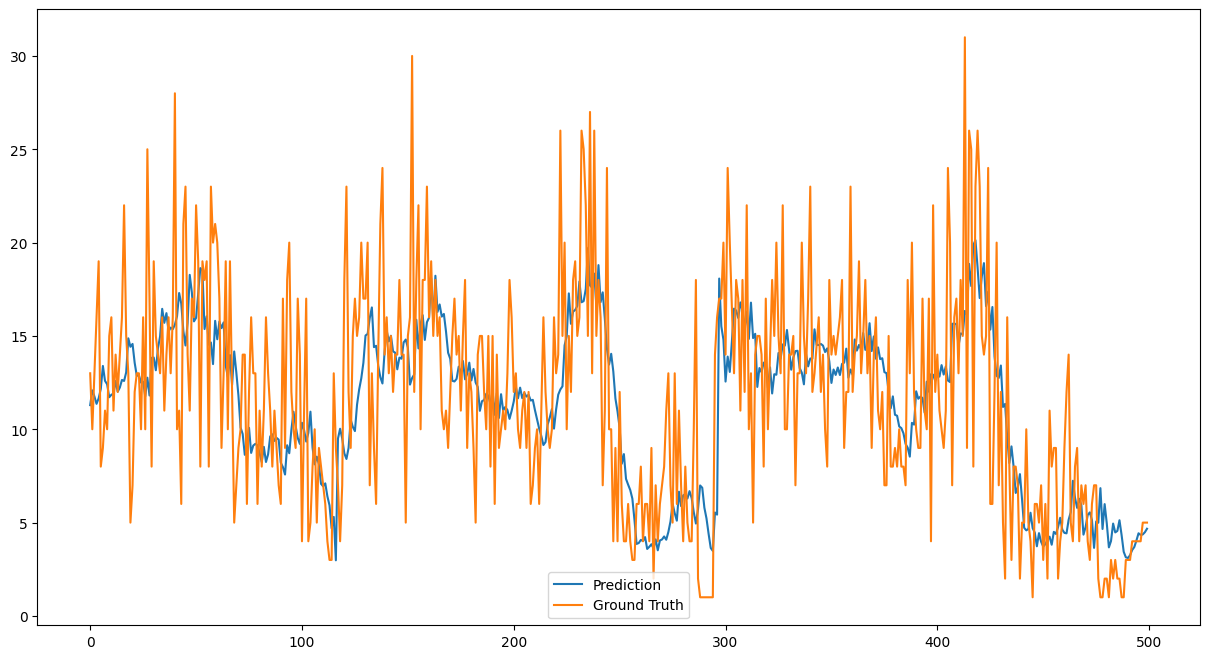

In [ ]:
visualize(predictions, gts, 0, 500)

In [ ]:
import pandas as pd
import json
import numpy as np
import pymysql
import mysql.connector
from mysql.connector import Error
import requests
from sqlalchemy import create_engine, text
from datetime import datetime
import time

In [ ]:
host = "34.142.166.212"
user = "TrTrongKhai"
password = "Nokhai14442002"
# Sử dụng class BatchETL
database = "hcmc-traffic-db"
db_uri = f'mysql+pymysql://{user}:{password}@{host}/{database}'

##  test predict

In [ ]:
# Sử dụng
host = '34.142.166.212'
port = 3306
user = "TrTrongKhai"
password = "Nokhai14442002"
database = "hcmc-traffic-db"
#ssl_ca = r'content/drive/MyDrive/Thesis/Code/DigiCertGlobalRootG2.crt.pem'

# Khởi tạo đối tượng MySQLConnector
connector = MySQLConnector(host, port, user, password, database)

# Kết nối đến cơ sở dữ liệu
connector.connect()

# Thực hiện truy vấn SQL và chuyển kết quả thành DataFrameco

query = "SELECT * FROM traffic_data_streaming"
df2 = connector.query_to_dataframe(query)

# Đóng kết nối
connector.close()

Connected to MySQL database
MySQL connection is closed


In [ ]:
df_2 = df2.copy()

In [ ]:
df2 = df_2

In [ ]:
df2.shape

(181, 122)

In [ ]:
def generate_sub_dfs(df, window_size=12):
    num_rows = len(df)
    sub_dfs = []
    for start in range(0, num_rows, window_size):
        end = start + window_size
        if end <= num_rows:
            sub_df = df[start:end].copy()
            sub_dfs.append(sub_df)
        else:
            break  # Dừng lại nếu không đủ 12 hàng
    return sub_dfs

In [ ]:
# Hàm tạo dữ liệu đầu vào
def generate_graph_seq2seq_input_data(df, x_offsets, add_time_in_day=True, add_day_in_week=False):
    num_samples, num_nodes = df.shape
    data = np.expand_dims(df.values, axis=-1)
    data_list = [data]
    if add_time_in_day:
        time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
        time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
        data_list.append(time_in_day)
    if add_day_in_week:
        day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
        day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
        data_list.append(day_in_week)
    data = np.concatenate(data_list, axis=-1)
    x = []
    min_t = abs(min(x_offsets))
    max_t = num_samples
    for t in range(min_t, max_t):
        x_t = data[t + x_offsets, ...]
        x.append(x_t)
    x = np.stack(x, axis=0)
    return x

In [ ]:
# Hàm dự đoán
def pred_1(model, g, x, lap_pos, batch_size, num_samples, num_steps, mean, std):
    model.eval()
    predictions = []
    g.ndata['lap_pos'] = lap_pos
    bs, seq_len, num_node, dim = x.shape
    batch_g = dgl.batch([g] * bs).to(device)

    x = x.reshape(seq_len, bs * num_node, dim)
    x = (x - mean) / std

    x = torch.tensor(x).float().clone().to(device)
    targets = x.permute(1, 0, 2)
    targets = targets[...,0]

    with torch.no_grad():
        out = model(batch_g, x, targets).squeeze()
    out = out * std[0, 0, 0] + mean[0, 0, 0]
    out = out.detach().cpu().numpy().reshape(num_steps, bs, num_node)
    out = np.transpose(out, axes=(1, 2, 0))

    predictions.extend(out.tolist())

    return predictions

In [ ]:
# Hàm đổi tên các cột
def rename_columns(predictions, present_sensors):
    num_columns = len(predictions[0])
    assert len(present_sensors) == num_columns, "Số lượng tên cột không khớp với số lượng cột trong DataFrame."

    present_sensors_list = list(present_sensors)
    data = {f"Column_{i+1}": predictions[0][i] for i in range(num_columns)}
    sensor_data = pd.DataFrame(data)
    sensor_data.columns = present_sensors_list

    return sensor_data

In [ ]:
# Hàm chuẩn bị và dự đoán
def prepare_and_predict(df, x_offsets, model, g, lap_pos, batch_size, present_sensors, sample):
    sub_dfs = generate_sub_dfs(df, window_size=12)
    predictions_list = []

    for sub_df in sub_dfs:
        sub_df.set_index('datetime', inplace=True)

        x2 = generate_graph_seq2seq_input_data(
            sub_df,
            x_offsets=x_offsets,
            add_time_in_day=True,
            add_day_in_week=False,
        )

        num_record, seq, num_node, dim = x2.shape
        x2 = x2.reshape(num_record, seq * num_node, dim)

        pos = 0
        x_final = []
        for j in range(len(x2)):
            if pos == 180:
                pos = 0
            k = np.c_[x2[j], np.array([sample[pos]] * 1464)]
            x_final.append(k)
            pos += 1
        x_final = np.array(x_final)

        mean = np.mean(x_final, axis=(0, 1))
        std = np.std(x_final, axis=(0, 1))
        mean = mean.reshape(1, 1, -1)
        std = std.reshape(1, 1, -1)
        std[std == 0] = 1

        x_final = x_final.reshape(1, 12, 122, 3)

        predictions = pred_1(model, g, x_final, lap_pos, batch_size, len(x_final), 12, mean, std)
        sensor_data = rename_columns(predictions, present_sensors)
        predictions_list.append(sensor_data)

    return predictions_list

In [ ]:
# Các giá trị cần thiết
x_offsets = np.sort(np.concatenate((np.arange(-11, 1, 1),)))
sample = np.array([i for i in range(900, 1081)])

In [ ]:
# Chuẩn bị và dự đoán
predictions_list = prepare_and_predict(df2, x_offsets, model, g, lap_pos, batch_size, present_sensors, sample)

In [ ]:
predictions = pd.concat(predictions_list, ignore_index=True)

In [ ]:
predictions.columns = present_sensors

In [ ]:
df2 = df2.drop(df2.index[-1])

In [ ]:
print(predictions.shape)
print(df2.shape)

(180, 122)
(180, 122)


In [ ]:
## Xóa 12 giá trị cuối, và 12 giá trị đầu
predictions_ = predictions.drop(index = range(len(predictions) - 12, len(predictions)))
df2_ = df2.iloc[12:]

In [ ]:
print(predictions_.shape)
print(df2_.shape)

(168, 122)
(168, 122)


In [ ]:
df2_.reset_index(inplace=True)

In [ ]:
datetime_column = df2_[['datetime']]
# Nối cột datetime vào predictions
predictions = pd.concat([datetime_column, predictions_], axis=1)

In [ ]:
df_pred = predictions.melt(id_vars=['datetime'], var_name='Sensors', value_name='Predicted_Count')

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20496 entries, 0 to 20495
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         20496 non-null  datetime64[ns]
 1   Sensors          20496 non-null  object        
 2   Predicted_Count  20496 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 480.5+ KB


In [ ]:
df_pred.head()

,datetime,Sensors,Predicted_Count
0,2024-07-23 08:30:00,0,6.091642
1,2024-07-23 08:35:00,0,6.123253
2,2024-07-23 08:40:00,0,5.914034
3,2024-07-23 08:45:00,0,5.557676
4,2024-07-23 08:50:00,0,5.960058


In [ ]:
df2 = df2_.melt(id_vars=['datetime'], var_name='Sensors', value_name='Count')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20496 entries, 0 to 20495
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  20496 non-null  datetime64[ns]
 1   Sensors   20496 non-null  object        
 2   Count     20496 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 480.5+ KB


In [ ]:
df2.head()

,datetime,Sensors,Count
0,2024-07-23 08:30:00,0,5.0
1,2024-07-23 08:35:00,0,6.0
2,2024-07-23 08:40:00,0,5.0
3,2024-07-23 08:45:00,0,1.0
4,2024-07-23 08:50:00,0,2.0


In [ ]:
df2['Sensors'] = df2['Sensors'].astype('int64')
df_pred['Sensors'] = df_pred['Sensors'].astype('int64')

In [ ]:
merged_df = pd.merge(df2, df_pred, on=['Sensors', 'datetime'], how='inner')

In [ ]:
merged_df.to_csv()

,datetime,Sensors,Count,Predicted_Count
0,2024-07-23 08:30:00,0,5.0,6.091642
1,2024-07-23 08:35:00,0,6.0,6.123253
2,2024-07-23 08:40:00,0,5.0,5.914034
3,2024-07-23 08:45:00,0,1.0,5.557676
4,2024-07-23 08:50:00,0,2.0,5.960058
...,...,...,...,...
20491,2024-07-23 22:05:00,139,3.0,10.030293
20492,2024-07-23 22:10:00,139,7.0,9.013107
20493,2024-07-23 22:15:00,139,7.0,7.981528
20494,2024-07-23 22:20:00,139,9.0,7.550226


In [ ]:
merged_df2 = pd.merge(nodes_df, merged_df, left_on='node_id', right_on='Sensors')

In [ ]:
merged_df2.sort_values(by=['datetime', 'node_id'], inplace=True)

In [ ]:
merged_df2.head(10)

,node_id,node_name,latitude,longitude,datetime,Sensors,Count,Predicted_Count
0,0,Khánh Hội - Hoàng Diệu,10.7596,106.699,2024-07-23 08:30:00,0,5.0,6.091642
168,1,Cao Thắng - Võ Văn Tần 1,10.7687,106.684,2024-07-23 08:30:00,1,37.0,38.321079
7896,2,Đinh Bộ Lĩnh - Bạch Đằng 2,10.8031,106.709,2024-07-23 08:30:00,2,11.0,10.607544
9744,3,Khánh Hội - Đường 41,10.7581,106.700,2024-07-23 08:30:00,3,29.0,31.967861
11256,4,Cách Mạng Tháng Tám – Hòa Hưng,10.7802,106.677,2024-07-23 08:30:00,4,39.0,53.974308
13104,5,Lý Tự Trọng - Hai Bà Trưng 2,10.7791,106.702,2024-07-23 08:30:00,5,21.0,21.100735
16128,7,Nguyễn Tất Thành - Tôn Đản,10.7626,106.708,2024-07-23 08:30:00,7,24.0,25.414761
17472,8,Nguyễn Tất Thành - Đoàn Như Hài,10.7667,106.706,2024-07-23 08:30:00,8,53.0,48.728020
18816,9,Cao Thắng - Võ Văn Tần 2,10.7690,106.683,2024-07-23 08:30:00,9,30.0,42.549171
336,10,Nguyễn Hữu Cảnh - Ngô Tất Tố 1,10.7892,106.715,2024-07-23 08:30:00,10,32.0,32.651691


In [ ]:
merged_df2['date'] = merged_df2['datetime'].dt.date
merged_df2['time'] = merged_df2['datetime'].dt.time

In [ ]:
merged_df2.head()

,node_id,node_name,latitude,longitude,datetime,Sensors,Count,Predicted_Count,date,time
0,0,Khánh Hội - Hoàng Diệu,10.7596,106.699,2024-07-23 08:30:00,0,5.0,6.091642,2024-07-23,08:30:00
168,1,Cao Thắng - Võ Văn Tần 1,10.7687,106.684,2024-07-23 08:30:00,1,37.0,38.321079,2024-07-23,08:30:00
7896,2,Đinh Bộ Lĩnh - Bạch Đằng 2,10.8031,106.709,2024-07-23 08:30:00,2,11.0,10.607544,2024-07-23,08:30:00
9744,3,Khánh Hội - Đường 41,10.7581,106.700,2024-07-23 08:30:00,3,29.0,31.967861,2024-07-23,08:30:00
11256,4,Cách Mạng Tháng Tám – Hòa Hưng,10.7802,106.677,2024-07-23 08:30:00,4,39.0,53.974308,2024-07-23,08:30:00


In [ ]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20496 entries, 0 to 6887
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   node_id          20496 non-null  int64         
 1   node_name        20496 non-null  object        
 2   latitude         20496 non-null  float64       
 3   longitude        20496 non-null  float64       
 4   datetime         20496 non-null  datetime64[ns]
 5   Sensors          20496 non-null  int64         
 6   Count            20496 non-null  float64       
 7   Predicted_Count  20496 non-null  float64       
 8   date             20496 non-null  object        
 9   time             20496 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 2.2+ MB
